## Linear Regression Practical Implementation
## Boston housing dataset

Divide Independent and Dependent features

Train Test splitting

Standardizing the dataset

Linear Regression 

Fitting(Model Training)

Cross validation (Mean Square Error)

predection of test data

Plot the difference between predected and true data

Performance Metrics

Importing all Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset=load_boston()  # loading boston housing dataset
data = pd.DataFrame(dataset.data,columns=dataset.feature_names) # initializing column names

In [42]:
data.head() # printing head

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<AxesSubplot: xlabel='B'>

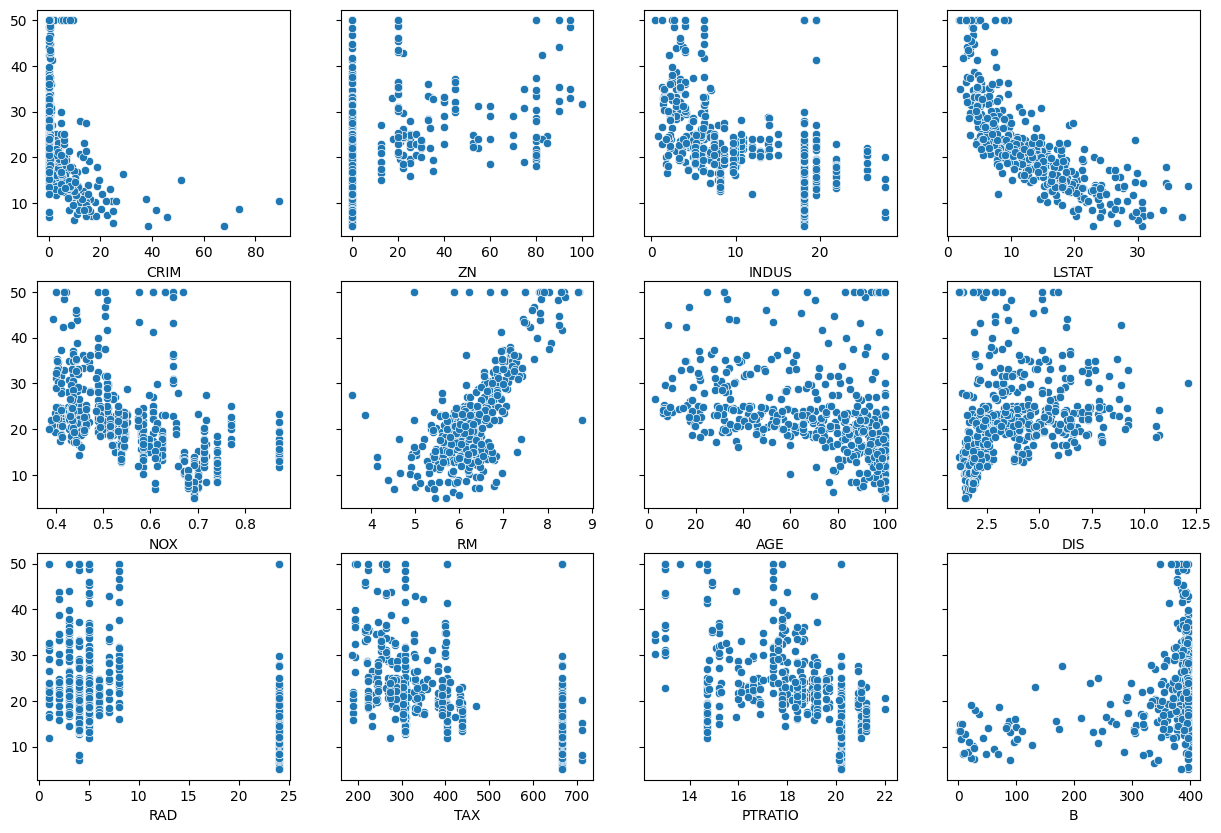

In [83]:
# Plotting between each independent and dependent features
fig, axes = plt.subplots(3, 4, figsize=(15, 10), sharey=True)
#fig.suptitle('Plotting between each independent and dependent features')
sns.scatterplot(data['CRIM'],dataset.target,ax=axes[0,0]) 
sns.scatterplot(data['ZN'],dataset.target,ax=axes[0,1]) 
sns.scatterplot(data['INDUS'],dataset.target,ax=axes[0,2]) 
sns.scatterplot(data['LSTAT'],dataset.target,ax=axes[0,3]) 
sns.scatterplot(data['NOX'],dataset.target,ax=axes[1,0]) 
sns.scatterplot(data['RM'],dataset.target,ax=axes[1,1]) 
sns.scatterplot(data['AGE'],dataset.target,ax=axes[1,2]) 
sns.scatterplot(data['DIS'],dataset.target,ax=axes[1,3]) 
sns.scatterplot(data['RAD'],dataset.target,ax=axes[2,0]) 
sns.scatterplot(data['TAX'],dataset.target,ax=axes[2,1]) 
sns.scatterplot(data['PTRATIO'],dataset.target,ax=axes[2,2]) 
sns.scatterplot(data['B'],dataset.target,ax=axes[2,3])

Independent and Dependent features

In [43]:
X=data  # all the independent features are copied to X
y=dataset.target # the dependent feature is copied to y

Train Test splitting

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# train test split with test size 30% so train size 70% 

Standardizing the dataset

In [46]:
# if we standardize the data then the linear regression will work better because,
# gradient descent curve will be obtained fast, so that we can get global maxima quickly

In [48]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)
# scaler.inverse_transform(X_train) we can obtain the original values by this

Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

LinearRegression()

Fitting( Model Training)

In [ ]:
regression.fit(X_train,y_train)

In [84]:
# regression coefficients
print('Coefficients: ', regression.coef_)
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(regression.score(X_test, y_test)))


Coefficients:  [-0.98858032  0.86793276  0.40502822  0.86183791 -1.90009974  2.80813518
 -0.35866856 -3.04553498  2.03276074 -1.36400909 -2.0825356   1.04125684
 -3.92628626]
Variance score: 0.7261570836552476


Cross validation

    Cross_val_score is a function in the scikit-learn package which trains and tests a  model over multiple folds of your dataset. This cross validation method gives you a  better understanding of model performance over the whole dataset instead of just a     single train/test split.

In [58]:
# The difference of predected and actual value is the mean squared error, 
# it needs to be as minimum as possible
from sklearn.model_selection import cross_val_score
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
print(mse)
print(np.mean(mse))

[-33.75185215 -21.4641199  -27.97099777 -17.7140812  -25.03832267]
-25.18787473928505


predection of test data

In [62]:
reg_pred=regression.predict(X_test) # these are the predected values of the test data

Plot the difference between predected and true value of test data using seaborn

C:\Users\91939\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: ylabel='Density'>

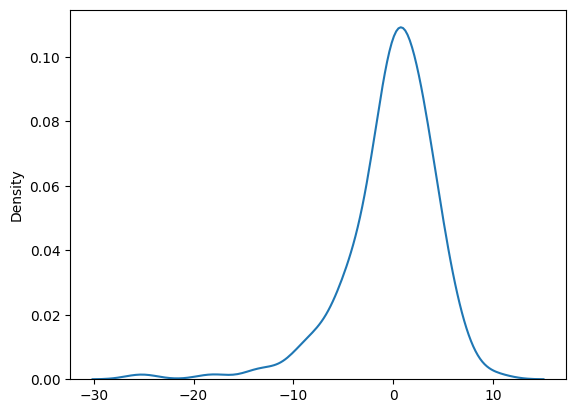

In [65]:
sns.distplot(reg_pred-y_test, hist = False) 
# the difference between predicted and true value is between -10 and 10

Performance Metrics

In [ ]:
from sklearn.metrics import r2_score # adjusted r square
score=r2_score(reg_pred,y_test)
print(score)

## Ridge Regression Implementation

Ridge Hyperparameter Tuning

In [86]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [87]:
ridge_regressor=Ridge()
ridge_regressor

Ridge()

Fitting 

In [89]:
parameters={'alpha':[1,2,3,4,12,13,14,15,20,21,22,30,40,50,100]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 12, 13, 14, 15, 20, 21, 22, 30,
                                   40, 50, 100]},
             scoring='neg_mean_squared_error')

In [90]:
print(ridgecv.best_params_)
print(ridgecv.best_score_)

{'alpha': 4}
-25.11411251058491


Predicting

In [91]:
ridge_predict=ridgecv.predict(X_test)

<AxesSubplot: ylabel='Density'>

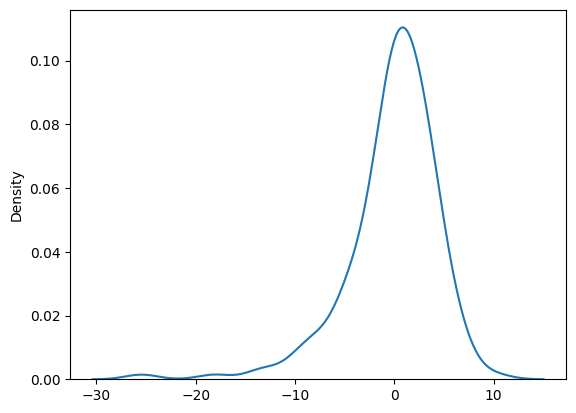

In [92]:
sns.distplot(ridge_predict-y_test, hist = False) 

Performance Metrics

In [93]:
from sklearn.metrics import r2_score
score=r2_score(ridge_predict,y_test)
print(score)

0.6611743301690023


## Lasso Regression Implementation

In [94]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [95]:
lasso_regressor=Lasso()
lasso_regressor

Lasso()

In [96]:
parameters={'alpha':[1,2,3,4,12,13,14,15,20,21,22,30,40,50,100]}
lassocv=GridSearchCV(lasso_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 12, 13, 14, 15, 20, 21, 22, 30,
                                   40, 50, 100]},
             scoring='neg_mean_squared_error')

In [97]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-30.317155919321323


In [98]:
lasso_predict=lassocv.predict(X_test)

<AxesSubplot: ylabel='Density'>

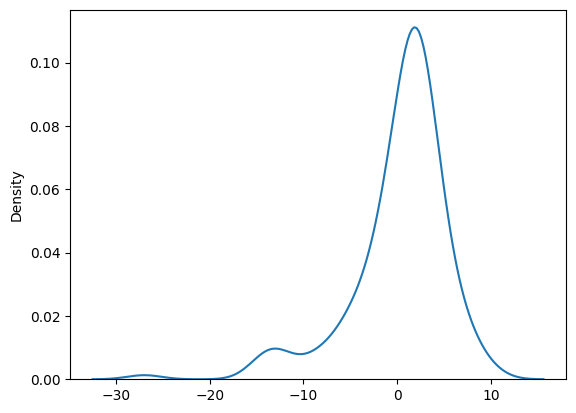

In [99]:
sns.distplot(lasso_predict-y_test, hist = False)

In [100]:
from sklearn.metrics import r2_score
score=r2_score(lasso_predict,y_test)
print(score)

0.30869284776106265
